## Unit 5 | Assignment - The Power of Plots

## Option 1: Pyber

The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

As final considerations:

* You must use the Pandas Library and the Jupyter Notebook.
* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
* Remember when making your plots to consider aesthetics!
  * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
  * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
  * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.
* See [Example Solution](Pyber/Pyber_Example.pdf) for a reference on expected format.


In [194]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as random
import seaborn as sns

In [195]:
# Read csv
# Store filepath in a variable
pyber_city_data = "Pyber/raw_data/city_data.csv"
pyber_ride_data = "Pyber/raw_data/ride_data.csv"

# Read our Data file with the pandas library
pyber_city_df = pd.read_csv(pyber_city_data)
pyber_ride_df = pd.read_csv(pyber_ride_data)

print(pyber_city_df.head())
print(pyber_ride_df.head())


             city  driver_count   type
0      Kelseyland            63  Urban
1      Nguyenbury             8  Urban
2    East Douglas            12  Urban
3   West Dawnfurt            34  Urban
4  Rodriguezburgh            52  Urban
          city                 date   fare        ride_id
0     Sarabury  2016-01-16 13:49:27  38.35  5403689035038
1    South Roy  2016-01-02 18:42:34  17.49  4036272335942
2  Wiseborough  2016-01-21 17:35:29  44.18  3645042422587
3  Spencertown  2016-07-31 14:53:22   6.87  2242596575892
4   Nguyenbury  2016-07-09 04:42:44   6.28  1543057793673


In [196]:
# merge the two files
combined_pyber_data_df = pd.merge(pyber_city_df, pyber_ride_df, how="outer", on=["city"])

# Show the header 
combined_pyber_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [197]:
# Describe the data
combined_pyber_data_df.describe()

,driver_count,fare,ride_id
count,2407.00000,2407.000000,2.407000e+03
mean,31.14167,26.867104,4.856048e+12
std,22.05840,12.007238,2.898402e+12
min,1.00000,4.050000,2.238753e+09
25%,12.00000,17.320000,2.354637e+12
50%,24.00000,26.490000,4.804713e+12
75%,51.00000,36.710000,7.356325e+12
max,73.00000,59.650000,9.997901e+12


In [198]:
# Average Fare ($) Per City
ave_fare = combined_pyber_data_df.groupby("city").fare.mean()
ave_fare.head()

city
Alvarezhaven    23.928710
Alyssaberg      20.609615
Anitamouth      37.315556
Antoniomouth    23.625000
Aprilchester    21.981579
Name: fare, dtype: float64

In [199]:
# Total Number of Rides Per City
tot_rides = combined_pyber_data_df.groupby("city").ride_id.count()
tot_rides.head()

city
Alvarezhaven    31
Alyssaberg      26
Anitamouth       9
Antoniomouth    22
Aprilchester    19
Name: ride_id, dtype: int64

In [200]:
# Total Number of Drivers Per City
tot_drivers = combined_pyber_data_df.groupby("city").driver_count.sum()
tot_drivers.head(5)

city
Alvarezhaven     651
Alyssaberg      1742
Anitamouth       144
Antoniomouth     462
Aprilchester     931
Name: driver_count, dtype: int64

In [201]:
# City Type (Urban, Suburban, Rural)
cit_type = combined_pyber_data_df.groupby("type").sum()
cit_type.head(5)

,driver_count,fare,ride_id
type,,,
Rural,727,4255.09,658729360193746
Suburban,9730,20335.69,3139583688401015
Urban,64501,40078.34,7890194186030600


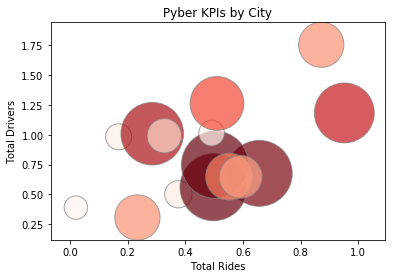

In [252]:
# Build bubble chart

# create data
tot_rides = np.random.rand(15)
y = tot_rides+np.random.rand(15)
z = tot_rides+np.random.rand(15)
z = z*z

# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(tot_rides, y, s=z*2500, c=z, cmap="Reds", alpha=0.7, edgecolors="grey", linewidth=1)

# Add labels
plt.title("Pyber KPIs by City")
plt.xlabel("Total Rides")
plt.ylabel("Total Drivers")

plt.show()

In [192]:
# Total Fares ($) by City Type
fare_ctype = combined_pyber_data_df.groupby("type").fare.sum()
fare_ctype.head(5)

type
Rural        4255.09
Suburban    20335.69
Urban       40078.34
Name: fare, dtype: float64

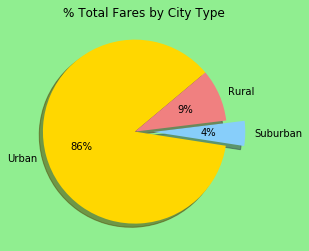

In [168]:
# % of Total Fares by City Type

#custom
labels = ["Urban","Suburban","Rural"]
shares = ["40078.34", "2033.69", "4255.09"]

# New Figure
fig = plt.figure(figsize=(4,4),frameon=True,facecolor="lightgreen")

# New Axes
ax = fig.add_subplot(1,1,1)

# Plot the data
ax.pie(shares,explode=(0,0.1,0),labels=labels,
       colors=["gold","lightskyblue","lightcoral"],
       autopct='%.0f%%',shadow=True,radius=0.5,counterclock=True,startangle=400)

ax.set(title="% Total Fares by City Type")

# Fit the plot layout
plt.axis("equal")

# Show the plot
plt.show()


In [169]:
# Total Rides by City Type
ride_ctype = combined_pyber_data_df.groupby("type").ride_id.count()
ride_ctype.head(5)

type
Rural        125
Suburban     657
Urban       1625
Name: ride_id, dtype: int64

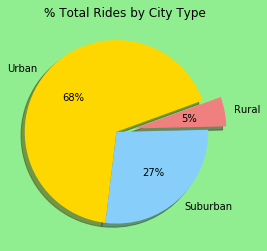

In [170]:
# % of Total Rides by City Type

#custom
labels = ["Urban","Suburban","Rural"]
shares = ["1625", "657", "125"]

# New Figure
fig = plt.figure(figsize=(4,4),frameon=True,facecolor="lightgreen")

# New Axes
ax = fig.add_subplot(1,1,1)

# Plot the data
ax.pie(shares,explode=(0,0,0.1),labels=labels,
       colors=["gold","lightskyblue","lightcoral"],
       autopct='%.0f%%',shadow=True,radius=0.5,counterclock=True,startangle=380)

ax.set(title="% Total Rides by City Type")

# Fit the plot layout
plt.axis("equal")

# Show the plot
plt.show()

In [171]:
# Total Drivers by City Type
driver_ctype = combined_pyber_data_df.groupby("type").driver_count.sum()
driver_ctype.head(5)

type
Rural         727
Suburban     9730
Urban       64501
Name: driver_count, dtype: int64

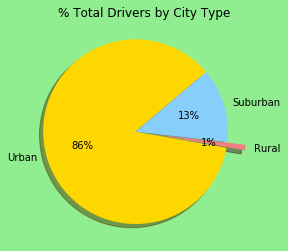

In [172]:
# % of Total Drivers by City Type

#custom
labels = ["Urban","Suburban","Rural"]
shares = ["64501", "9730", "727"]

# New Figure
fig = plt.figure(figsize=(4,4),frameon=True,facecolor="lightgreen")

# New Axes
ax = fig.add_subplot(1,1,1)

# Plot the data
ax.pie(shares,explode=(0,0,0.1),labels=labels,
       colors=["gold","lightskyblue","lightcoral"],
       autopct='%.0f%%',shadow=True,radius=0.5,counterclock=False,startangle=350)

ax.set(title="% Total Drivers by City Type")

# Fit the plot layout
plt.axis("equal")

# Show the plot
plt.show()

 # Three observable trends about the data.
    
    1. Anitamouth has the highest average fare of all the cities. 
    2. Urban city type has the most number of drivers while Rural city type has the least. 
    3. By % total, Suburban city type account for the lowest share. This matches conventional thinking that
       suburbanites are more likely to drive their own cars to urban centers while city dwellers and rural folks 
       would deem it more practical to ride public transportation.
    